<a href="https://colab.research.google.com/github/champsleague/Machine-Learning-Projects/blob/main/ML_phw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bcancer.data to bcancer (2).data


In [ ]:
import io
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# scale features
scaler = StandardScaler()
model = scaler.fit(df)
df_standard = model.transform(df)
 
# print StandardScaler data
print(df_standard,'\n\n\n')


# scale features
scaler = MinMaxScaler()
model=scaler.fit(df)
df_minmax=model.transform(df)
 
# print scaled features
print(df_minmax,'\n\n\n')



# scale features
scaler = MaxAbsScaler()
model=scaler.fit(df)
df_maxabs=model.transform(df)
 
# print scaled features
print(df_maxabs,'\n\n\n')



# scale features
scaler = RobustScaler()
model=scaler.fit(df)
df_robust=model.transform(df)
 
# print scaled features
print(df_robust,'\n\n\n')



# scale features
df_normalize = (df - df.min())/ (df.max() - df.min())
print(df_normalize)

[[-0.11623873  0.20693572 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 [-0.1115035   0.20693572  0.28384518 ... -0.28411186 -0.34391178
  -0.72539705]
 [-0.09126525 -0.50386559 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 ...
 [-0.29657482  0.20693572  2.25152563 ...  2.33759359  0.23956962
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  1.02674087 -0.34391178
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  0.37131451 -0.34391178
   1.37855538]] 



[[0.07006726 0.44444444 0.         ... 0.         0.         0.        ]
 [0.07028528 0.44444444 0.33333333 ... 0.11111111 0.         0.        ]
 [0.07121713 0.22222222 0.         ... 0.         0.         0.        ]
 ...
 [0.06176386 0.44444444 1.         ... 1.         0.11111111 1.        ]
 [0.06240981 0.33333333 0.77777778 ... 0.55555556 0.         1.        ]
 [0.06240981 0.33333333 0.77777778 ... 0.33333333 0.         1.        ]] 



[[0.07432725 0.5        0.1        ... 0.1        0.1   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


accuracy of decision tree (entropy):  0.35


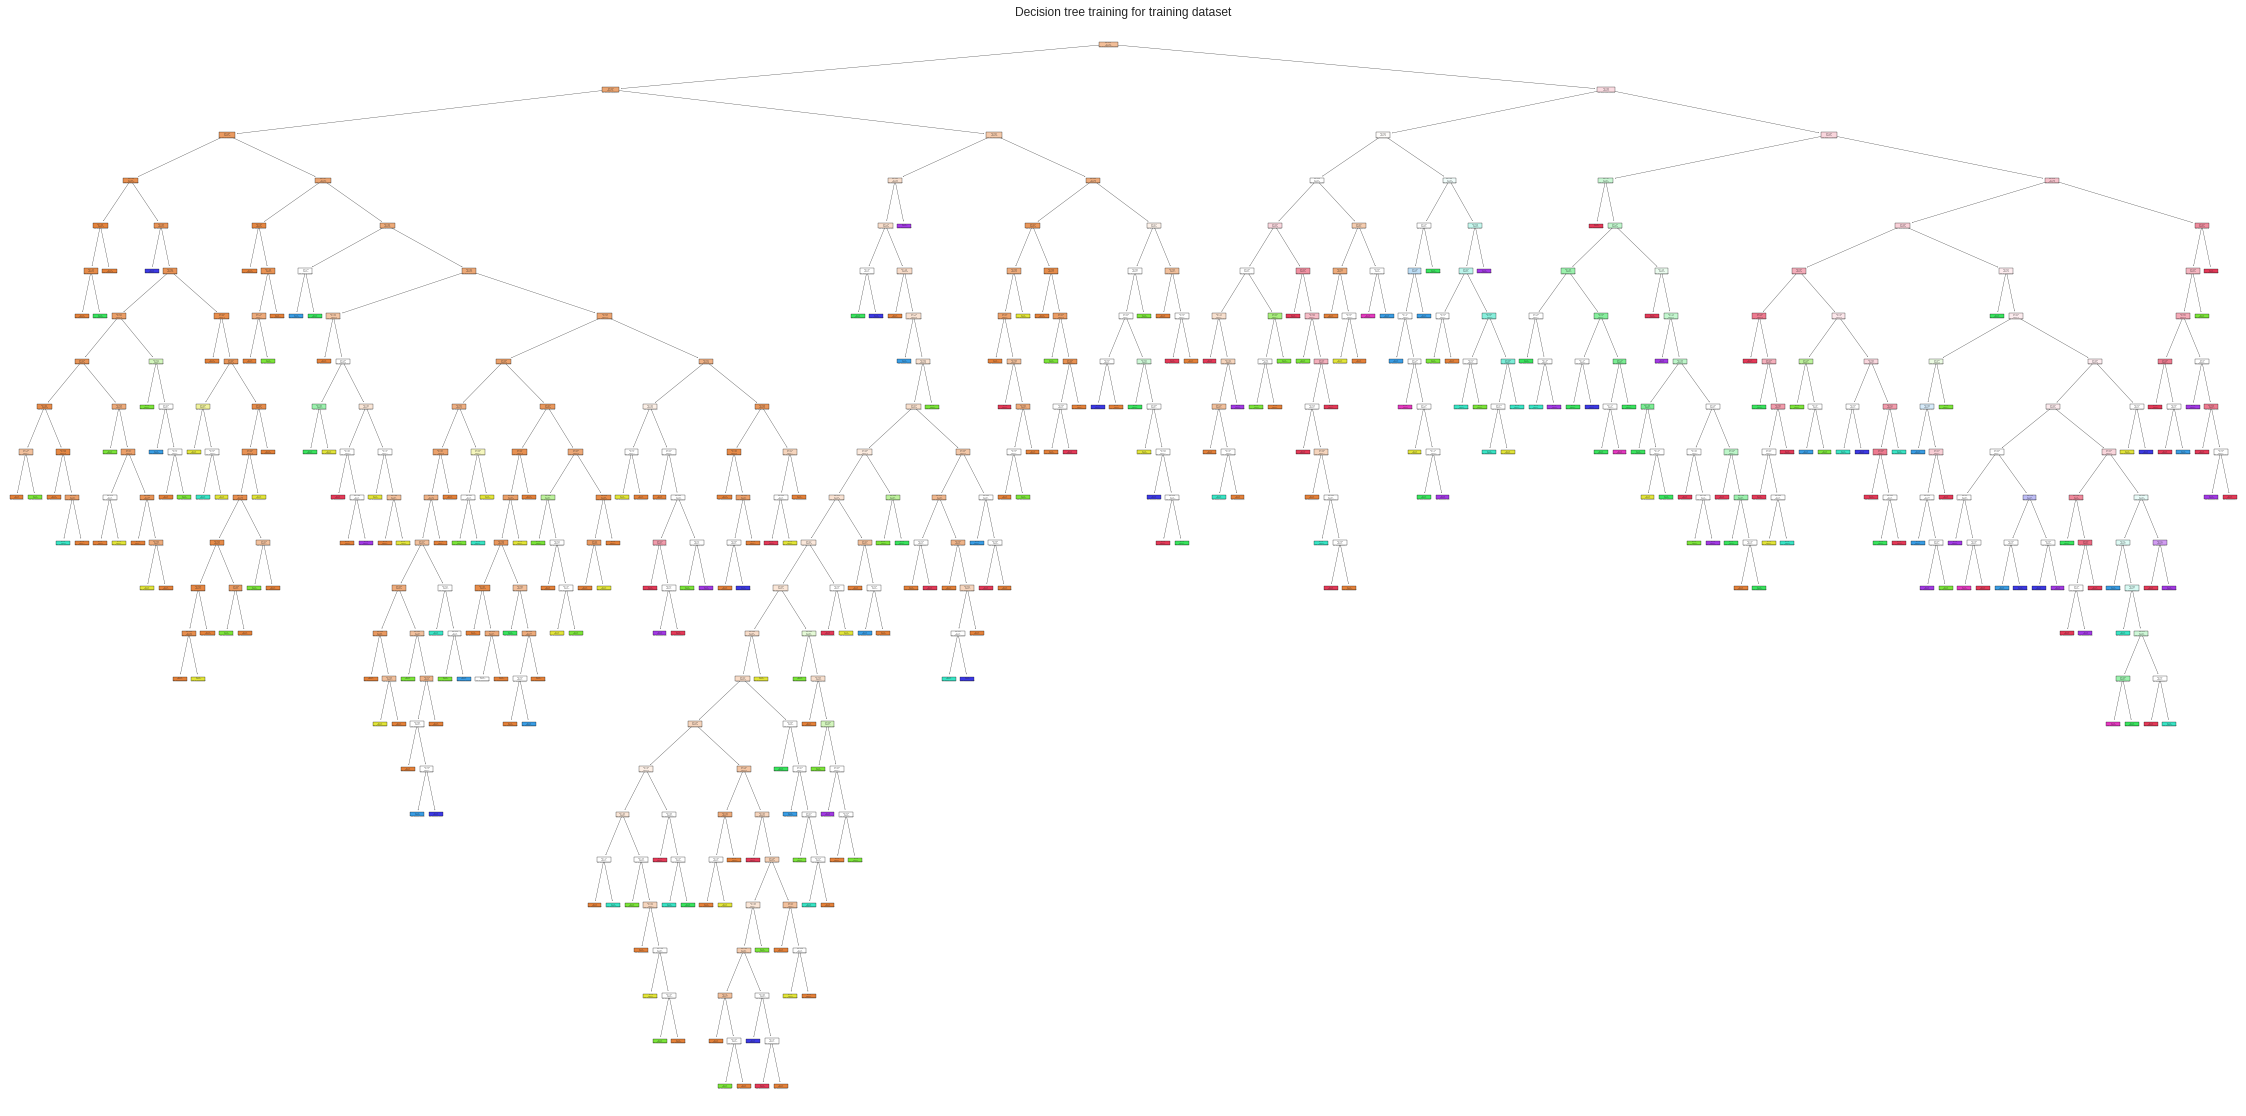

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)


# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# providing the inputs for the scaling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

# criterion = gini
# classifer = DecisionTreeClassifier(criterion='gini', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)

y_pred = classifer.predict(X_test)

# importing the accuracy score
from sklearn.metrics import accuracy_score

# accuracy
print('accuracy of decision tree (entropy): ',accuracy_score(y_pred,y_test))
# print('accuracy of decision tree (gini): ',accuracy_score(y_pred,y_test))


# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()


accuracy :  0.4785714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


[0.6        0.6        0.61428571 0.61428571 0.54285714 0.61428571
 0.57142857 0.64285714 0.62857143 0.57971014]


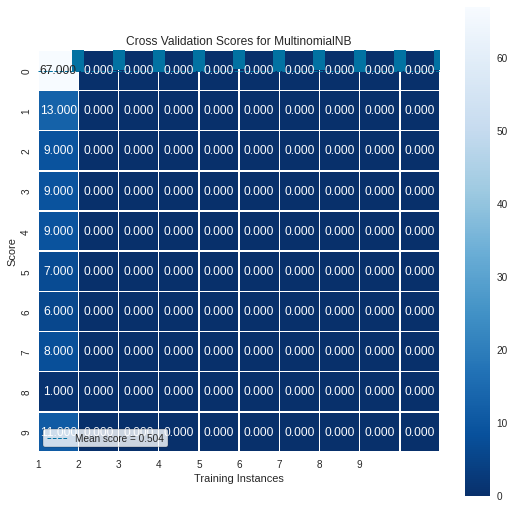

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Make an instance of the Model
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)


# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[0].reshape(1,-1))
logisticRegr.predict(X_test[0:10])
predictions = logisticRegr.predict(X_test)


# Use score method to get accuracy of model
accuracy = logisticRegr.score(X_test, y_test)
print('accuracy : ',accuracy)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = MultinomialNB()
clf = model.fit(X,y)

scores = cross_val_score(clf, X, y, cv=cv)
print(scores)
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        
visualizer.show()  

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import io   

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

clf = svm.SVC(kernel='linear',C=1).fit(X_train,y_train)

classifier_predictions = clf.predict(X_test)
print('accuracy of SVM : ',accuracy_score(y_test,classifier_predictions)*100)




accuracy :  [0.59285714 0.60714286 0.57857143 0.61428571 0.5971223 ]


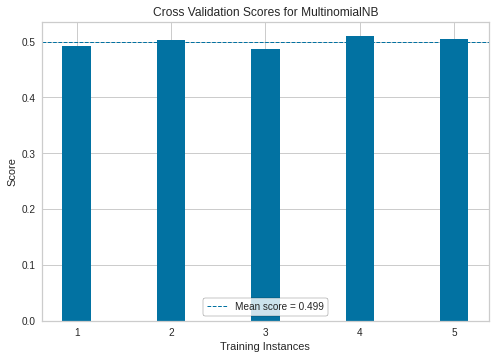

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from yellowbrick.datasets import load_occupancy
from yellowbrick.model_selection import CVScores

df = pd.read_csv(io.StringIO(uploaded['bcancer.data'].decode('utf-8')))
df = df.replace('?', np.nan)
df.dropna()


# splitting the dataset into input and output datasets
X = df.iloc[:, [0,1]].values
y = df.iloc[:, 2].values

# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split

# random state is 0 and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Use the k-fold method, with k=5.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define and build the model
model = MultinomialNB()
clf = model.fit(X,y)

accuracy = cross_val_score(clf, X, y, cv=cv)
print('accuracy : ',accuracy)

visualizer = CVScores(model, cv=cv, scoring='f1_weighted')
visualizer.fit(X, y)        
visualizer.show()  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Function importing Dataset
def importdata():
	balance_data = pd.read_csv(
'https://archive.ics.uci.edu/ml/machine-learning-'+
'databases/balance-scale/balance-scale.data',
	sep= ',', header = None)
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

# Driver code
def main():
	
	# Building Phase
	data = importdata()
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
	
	# Operational Phase
	print("Results Using Gini Index:")
	
	# Prediction using gini
	y_pred_gini = prediction(X_test, clf_gini)
	cal_accuracy(y_test, y_pred_gini)
	
	print("Results Using Entropy:")
	# Prediction using entropy
	y_pred_entropy = prediction(X_test, clf_entropy)
	cal_accuracy(y_test, y_pred_entropy)
	
	
# Calling main function
if __name__=="__main__":
	main()


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat